# Convolution Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a CNN model to predict the class of digit.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it. 

In [2]:
# the data, shuffled and split between train and test sets 
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

### Reshape and normalize the features

In [3]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train_pre.reshape(X_train_pre.shape[0], img_rows, img_cols, 1) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], img_rows, img_cols, 1) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. 
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 28, 28, 1)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [4]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)

## The model

### Build the model

In [5]:
model = keras.Sequential()
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), # padding = "same",
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters = 20, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               32100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Train the model

In [7]:
EPOCHS = 20
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train, 
                    batch_size=BATCH, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

Epoch 1/20
375/375 [==============================] - 14s 33ms/step - loss: 0.3104 - accuracy: 0.9090 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 2/20
375/375 [==============================] - 12s 33ms/step - loss: 0.0886 - accuracy: 0.9730 - val_loss: 0.0838 - val_accuracy: 0.9741
Epoch 3/20
375/375 [==============================] - 10s 26ms/step - loss: 0.0631 - accuracy: 0.9805 - val_loss: 0.0661 - val_accuracy: 0.9802
Epoch 4/20
375/375 [==============================] - 10s 27ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0755 - val_accuracy: 0.9759
Epoch 5/20
375/375 [==============================] - 13s 36ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.0538 - val_accuracy: 0.9847
Epoch 6/20
375/375 [==============================] - 11s 28ms/step - loss: 0.0331 - accuracy: 0.9900 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 7/20
375/375 [==============================] - 10s 27ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0484 - val_accuracy:

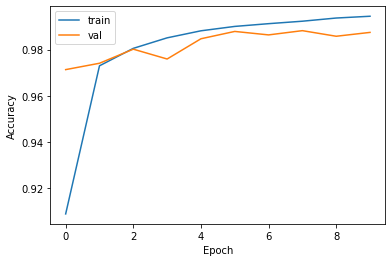

In [8]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [9]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 99.08%


Make predictions for testing data

In [10]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

array([7, 2, 1, 0, 4])

Visualize predictions

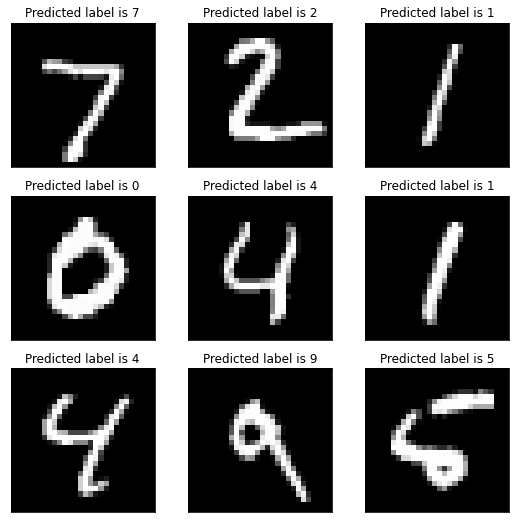

In [11]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## With Dropout

In [12]:
model = keras.Sequential()
model.add(layers.Conv2D(filters = 10, kernel_size=(5, 5), # padding = "same",
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(20, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

optimizer = keras.optimizers.RMSprop(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dropout (Dropout)            (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              

In [ ]:
EPOCHS = 20
BATCH = 128
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# use validation_split argument to do train-validation split
history = model.fit(X_train, y_train, 
                    batch_size=BATCH, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=1,
                    callbacks=[early_stop])

In [ ]:
plot_history(history)

In [ ]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))